In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score
import prepare_telco
import wrangle
import os
from env import user, password, host
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

import warnings
warnings.filterwarnings('ignore')


from scipy.stats import pearsonr, spearmanr

In [ ]:
# Load your zillow dataset.

# Fit a linear regression model (ordinary least squares) and 
# compute yhat, predictions of taxvaluedollarcnt using only 
# calfulatedfinishedsqft.

In [2]:
df=wrangle.wrangle_zillow()


In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094583 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2094583 non-null  int32  
 1   bathroomcnt                   2094583 non-null  float64
 2   calculatedfinishedsquarefeet  2094583 non-null  int32  
 3   taxvaluedollarcnt             2094583 non-null  int32  
 4   yearbuilt                     2094583 non-null  int32  
 5   taxamount                     2094583 non-null  float64
 6   fips                          2094583 non-null  int32  
dtypes: float64(2), int32(5)
memory usage: 87.9 MB


In [23]:
train, validate, test = prepare_telco.split(df, stratify_by=None)

In [24]:
train.shape, validate.shape, test.shape

((1172966, 7), (502700, 7), (418917, 7))

In [25]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
421888,3,2.0,1550,357034,1961,4418.72,6037
548087,3,3.5,1800,287774,1996,2798.18,6059
714717,3,2.0,1542,588738,1923,7210.51,6037
749704,3,1.0,1128,290984,1952,3622.02,6037
539577,0,1.0,396,34541,1942,579.61,6037


In [26]:
train = train[train.calculatedfinishedsquarefeet < 100_000]

In [27]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
421888,3,2.0,1550,357034,1961,4418.72,6037
548087,3,3.5,1800,287774,1996,2798.18,6059
714717,3,2.0,1542,588738,1923,7210.51,6037
749704,3,1.0,1128,290984,1952,3622.02,6037
539577,0,1.0,396,34541,1942,579.61,6037


In [29]:
train.shape, validate.shape, test.shape

((1172965, 7), (502700, 7), (418917, 7))

In [33]:
#target baseline
train['baseline'] = train.taxvaluedollarcnt.mean()
train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,baseline
421888,3,2.0,1550,357034,1961,4418.72,6037,398734.974807
548087,3,3.5,1800,287774,1996,2798.18,6059,398734.974807
714717,3,2.0,1542,588738,1923,7210.51,6037,398734.974807


In [39]:
train.taxvaluedollarcnt.mean()

398734.97480743245

In [34]:
# plot data with baseline

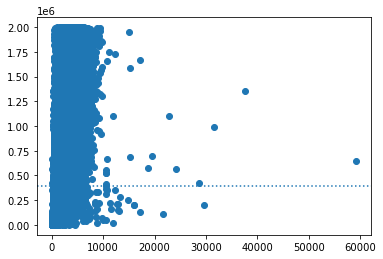

In [41]:
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.axhline(train.taxvaluedollarcnt.mean(), ls = ':') #ls=line style

In [45]:
# #OLS

# #create/fit the model
# ols_model = ols('taxvaluedollarcnt ~ calculatedfinishedsquarefeet', data=train).fit()
# # compute predictions and attach to DF
# train['yhat'] = ols_model.predict(train.taxvaluedollarcnt)

# train.head(3)

In [44]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(train[['calculatedfinishedsquarefeet']], train.taxvaluedollarcnt)

# make prediction
train['yhat'] = lm.predict(train[['calculatedfinishedsquarefeet']])

train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,baseline,yhat
421888,3,2.0,1550,357034,1961,4418.72,6037,398734.974807,341596.873182
548087,3,3.5,1800,287774,1996,2798.18,6059,398734.974807,399349.520304
714717,3,2.0,1542,588738,1923,7210.51,6037,398734.974807,339748.788474
749704,3,1.0,1128,290984,1952,3622.02,6037,398734.974807,244110.404839
539577,0,1.0,396,34541,1942,579.61,6037,398734.974807,75010.654066
...,...,...,...,...,...,...,...,...,...
83961,3,2.5,2460,463327,1966,5183.18,6059,398734.974807,551816.508706
828457,2,1.5,1191,517777,1987,5353.78,6059,398734.974807,258664.071914
722901,3,2.0,1755,478054,1944,5785.01,6037,398734.974807,388954.043822
821001,3,1.0,1188,72975,1947,482.63,6037,398734.974807,257971.040149


Text(0.5, 1.0, 'Baseline and OLS regression model')

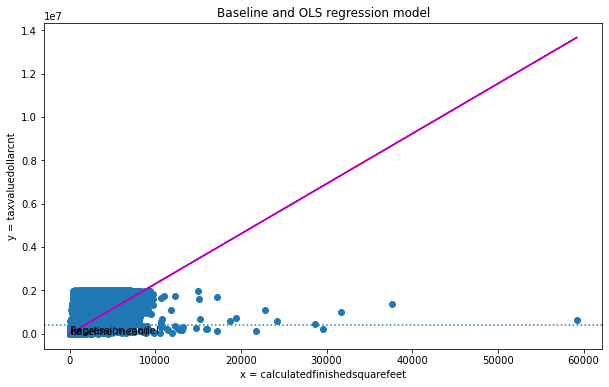

In [46]:
#visualize the data

fig = plt.figure(figsize = (10,6))
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.axhline(train.taxvaluedollarcnt.mean(), ls = ':')
plt.plot(train.calculatedfinishedsquarefeet, train.yhat, color='m')
plt.text(42,2.75, 'baseline(mean)')
plt.text(35,5.65, 'Regression model')
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = taxvaluedollarcnt')
plt.title('Baseline and OLS regression model')

In [47]:
# 3. Plot the residuals for the linear regression model that you made.
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline

In [48]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,baseline,yhat,residual,baseline_residual
421888,3,2.0,1550,357034,1961,4418.72,6037,398734.974807,341596.873182,15437.126818,-41700.974807
548087,3,3.5,1800,287774,1996,2798.18,6059,398734.974807,399349.520304,-111575.520304,-110960.974807
714717,3,2.0,1542,588738,1923,7210.51,6037,398734.974807,339748.788474,248989.211526,190003.025193
749704,3,1.0,1128,290984,1952,3622.02,6037,398734.974807,244110.404839,46873.595161,-107750.974807
539577,0,1.0,396,34541,1942,579.61,6037,398734.974807,75010.654066,-40469.654066,-364193.974807


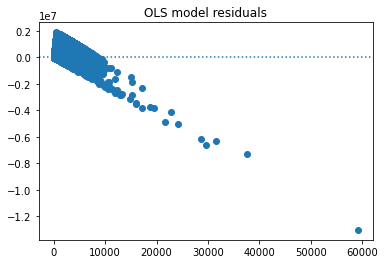

In [49]:
#should only be left with random noise: ϵ
#after removing linear trend
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');



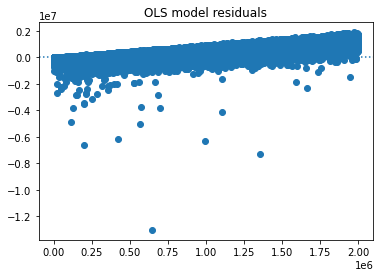

In [50]:
plt.scatter(train.taxvaluedollarcnt, train.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

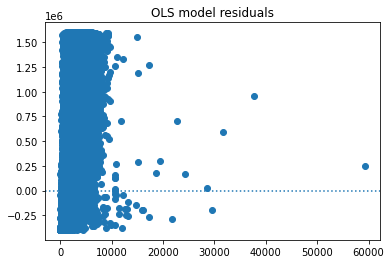

In [51]:
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

#### 4. 
    -Calculate the:
    -mean squared error (MSE)
    -sum of squared errors (SSE)
    -root mean squared error (RMSE)
    -total sum of squares (TSS)
    -TSS = SSE_baseline
    -TSS = SSE + ESS
    explained sum of squares (R2)

    -R^2 = ESS/TSS
    -R^2 = 1 - SSE/TSS 
(since ESS + SSE = TSS)
for your model.

In [52]:
# Mean Squared Error (MSE) via sklearn
MSE = mean_squared_error(train.taxvaluedollarcnt, train.yhat)
MSE_baseline = mean_squared_error(train.taxvaluedollarcnt, train.baseline)

print(f"MSE: {MSE}") 
print(f"MSE baseline: {MSE_baseline}") 

MSE: 64911583554.72536
MSE baseline: 98437918521.73708


In [53]:
# Sum of Squared Errors (SSE)
SSE = MSE * len(train)
SSE_baseline = MSE_baseline * len(train)

print(f"SSE: {SSE}") 
print(f"SSE baseline: {SSE_baseline}") 

SSE: 7.613901560426843e+16
SSE baseline: 1.1546423309884933e+17


In [54]:
# Root Mean Squared Errors (RMSE)
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print(f"RMSE: {RMSE}") 
print(f"RMSE baseline: {RMSE_baseline}") 

RMSE: 254777.5177576023
RMSE baseline: 313748.17692177446


In [55]:
# Total sum of Squares (TSS)
TSS = SSE_baseline
print(f"TSS: {TSS} :SSE_baseline") 

TSS: 1.1546423309884933e+17 :SSE_baseline


In [56]:
# Explained Sum of Squares (ESS) AKA: 'Explained Error'
ESS = TSS - SSE

print(f"ESS: {ESS}") 

ESS: 3.93252174945809e+16


In [57]:
# R^2
R2 = 1 - (SSE/TSS)

print(f"R2: {R2}") 

R2: 0.34058354209926156


In [58]:
# R^2
R2_alt = ESS/TSS

print(f"R2: {R2_alt}") 

R2: 0.3405835420992615


### 5. Calculate
    sum of squared errors (SSE_baseline)
    mean squared error (MSE_baseline)
    root mean squared error (RMSE_baseline)
    
    for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [59]:
print(f"SSE baseline: {SSE_baseline}") 
print(f"MSE baseline: {MSE_baseline}") 
print(f"RMSE baseline: {RMSE_baseline}") 

SSE baseline: 1.1546423309884933e+17
MSE baseline: 98437918521.73708
RMSE baseline: 313748.17692177446


### 6. Write python code that
    -compares the sum of squared errors for your model (SSE) against the sum of squared errors for the baseline model (SSE_baseline) and
    -outputs whether or not your model performs better than the baseline model

In [60]:
if (SSE < SSE_baseline):
    print(f"Linear Regression Model's SSE {round(SSE, 3)} performs better than the Baseline SSE {round(SSE_baseline, 3)}.")
        
else:
    print(f"The Baseline SSE {round(SSE_baseline, 3)} performs better than the Linear Regression Model's SSE {round(SSE, 3)}.")
    

Linear Regression Model's SSE 7.613901560426843e+16 performs better than the Baseline SSE 1.1546423309884933e+17.


### 7. What is the amount of variance explained in your model?

In [61]:
print(f"R2: {R2}")

R2: 0.34058354209926156


In [63]:
# ols_model.summary()

In [70]:
# calculate R2 the easy way Note: explained_variance_score == r2_score:

from sklearn.metrics import r2_score
r2_score(train.taxvaluedollarcnt, train.yhat)

0.34058354209926156

### 8. is your model significantly better than the baseline model?

In [65]:
null_hypothesis = "β1 = β2: The baseline and linear regression models are the same."
alt_hypothesis = "β1 != β2: The baseline and linear regression models are NOT the same."

In [66]:
α = 0.05

In [73]:
from sklearn.feature_selection import f_regression

f_regression(X, Y)

(array([            nan, 605826.39166024]), array([nan,  0.]))

In [ ]:
# import pandas
# import statsmodels.api as sm
# df = pandas.read_csv("restaurants.csv")
# X = df['Food_Quality']
# Y = df['Price']
# X = sm.add_constant(X)
# model = sm.OLS(Y, X).fit()
# summary = model.summary()
# print(summary)

In [71]:
import statsmodels.api as sm

In [72]:
X = train['calculatedfinishedsquarefeet']
Y = train['taxvaluedollarcnt']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 6.058e+05
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:19:12   Log-Likelihood:            -1.6266e+07
No. Observations:             1172965   AIC:                         3.253e+07
Df Residuals:                 1172963   BIC:                         3.253e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Create a file named evaluate.py that contains the following functions.

    -plot_residuals(y, yhat): creates a residual plot
    -regression_errors(y, yhat): returns the following values:
    -sum of squared errors (SSE)
    -explained sum of squares (ESS)
    -total sum of squares (TSS)
    -mean squared error (MSE)
    -root mean squared error (RMSE)
    -baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    -better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
# def sse_vs_baseline(df, y, x):
#     '''
    
#     '''
#     df['baseline'] = df[y].mean()
    
#     ols_model = ols('y ~ x', data=df).fit()
#     df['yhat'] = ols_model.predict(df[x])
    
#     MSE = mean_squared_error(df[y], df.yhat)
#     MSE_baseline = mean_squared_error(df[y], df.baseline)
    
#     SSE = MSE * len(df)
#     SSE_baseline = MSE_baseline * len(df)
    
#     if (SSE < SSE_baseline):
#         print(f"Linear Regression Model's SSE {round(SSE, 3)} performs better than the Baseline SSE {round(SSE_baseline, 3)}.")
        
#     else:
#         print(f"The Baseline SSE {round(SSE_baseline, 3)} performs better than the Linear Regression Model's SSE {round(SSE, 3)}.")
        
    
    

In [ ]:
# # Now we fit a regression model using OLS method.
# # OLS = ordinary least squares.

# # create the model object
# lm = LinearRegression(normalize=True)

# # fit the model to training data
# lm.fit(train[['calculatedfinishedsquarefeet']], train.taxvaluedollarcnt)

# # make prediction
# train['yhat'] = lm.predict(train[['calculatedfinishedsquarefeet']])

# train

In [ ]:
def base():
    '''
    
    '''
    
    x = df['{var}']
    y = df['{target}']

In [74]:
def plot_residuals(target, yhat):
    '''
    plot_residuals will take in a target series and prediction series
    and plot the residuals as a scatterplot.
    '''
    
    residual = target - yhat
    
    plt.scatter(target, residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel("target")
    plt.ylabel("residual")
    plt.title('Residual Plot')
    plt.show

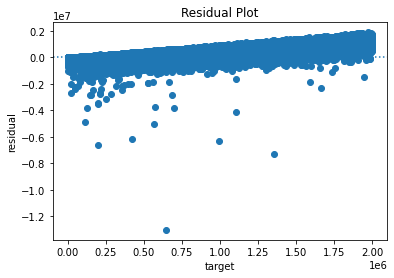

In [76]:
plot_residuals(train.taxvaluedollarcnt, train.yhat)

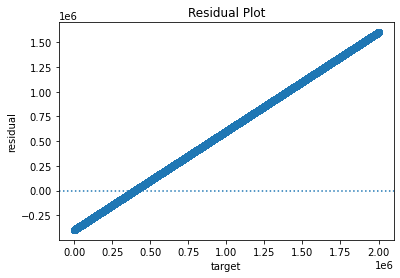

In [77]:
plot_residuals(train.taxvaluedollarcnt, train.baseline)

In [78]:
def regression_errors(target, yhat):
    '''
    regression_errors takes in a target and prediction series
    and prints out the regression error metrics.
    '''
    residual = target - yhat
    
    mse = mean_squared_error(target, yhat)
    sse = (residual **2).sum()
    rmse = sqrt(mse)
    tss = ((target - yhat.mean()) ** 2).sum()
    ess = ((yhat - target.mean()) ** 2).sum()
    print(f"""
    MSE: {round(mse,2)}
    SSE: {round(sse,2)}
    RMSE: {round(rmse,2)}
    TSS: {round(tss,2)}
    ESS: {round(ess,2)}
    """)
    

In [79]:
regression_errors(train.taxvaluedollarcnt, train.yhat)


    MSE: 64911583554.73
    SSE: 7.613901560426843e+16
    RMSE: 254777.52
    TSS: 1.1546423309884933e+17
    ESS: 3.93252174945813e+16
    


In [80]:
def baseline_mean_errors(target):
    '''
    baseline_mean_errors takes in a target 
    and prints out the regression error metrics for the baseline.
    '''
    baseline = target.mean()
    
    residual = target - (baseline)
    
    sse_baseline = (residual **2).sum()
    mse_baseline = sse_baseline * len(target)
    rmse_baseline = sqrt(mse_baseline)
    
    print(f"""
    MSE_baseline: {round(MSE_baseline,2)}
    SSE_baseline: {round(SSE_baseline,2)}
    RMSE_baseline: {round(RMSE_baseline,2)}
    """)

In [81]:
baseline_mean_errors(train.taxvaluedollarcnt)


    MSE_baseline: 98437918521.74
    SSE_baseline: 1.1546423309884933e+17
    RMSE_baseline: 313748.18
    


In [82]:
def better_than_baseline(target, yhat):
    '''
    better_than_baseline takes in a target and prediction 
    and returns boolean answering if the model is better than the baseline.
    '''
    
    rmse_baseline = sqrt((((target - (target.mean())) **2).sum()) * len(target))
    rmse_model = sqrt((((target - yhat) **2).sum()) * len(target))
    return rmse_model < rmse_baseline

In [83]:
better_than_baseline(train.taxvaluedollarcnt, train.yhat)

True

In [84]:
def model_significance(ols_model):
    return {
        'r^2 -- variance explained': ols_model.rsquared,
        'p-value -- P(data|model == baseline)': ols_model.f_pvalue,
    }

In [85]:
model_significance(ols_model)

NameError: name 'ols_model' is not defined

In [86]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

In [87]:
def reg_error_metrics(target, yhat):
    '''
    reg_error_metrics takes in target and prediction series 
    and returns a dataframe that contains the SSE/MSE/RMSE metrics 
    for. both model and baseline
    and answers if the model is better than the baseline.
    '''
    
    df = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
    
    df['model_error'] = np.array([sse(target, yhat),  mse(target, yhat), rmse(target, yhat)])
    
    df['baseline_error'] = np.array([sse(target, target.mean()), mse(target, target.mean()), rmse(target, target.mean())])
    
    df['better_than_baseline'] = df.baseline_error > df.model_error
    
    df = df.set_index("metric")
    
    return df

In [88]:
reg_error_metrics(train.taxvaluedollarcnt, train.yhat)

,model_error,baseline_error,better_than_baseline
metric,,,
SSE,7.613902e+16,1.154642e+17,True
MSE,6.491158e+10,9.843792e+10,True
RMSE,2.547775e+05,3.137482e+05,True


In [ ]:
# - Sum of Squared Errors
#     - (Residuals**2).sum()
# - Explained sum of squares
#     -  ((yhat-baseline)**2).sum()
# - Total sum of squares
#     - (Sum of Squared Errors) + (Explained Sum of Squares)
# - Mean Squared Error
#     - (Sum of Squared Errors)/(Count of Residuals)
# - Root Mean Squared Error
#     - $ \sqrt(Mean Squared Error) $
